In [ ]:
from keras.layers import Input, Dense
from keras.models import Model

In [ ]:
# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

In [ ]:
# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)
# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)
# this model maps an input to its encoded representation
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy', metrics=['accuracy'])
from keras.datasets import fashion_mnist
import numpy as np
(x_train, _), (x_test, _) = fashion_mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

#introducing noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

history = autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test_noisy))


Epoch 1/10
235/235 [==============================] - 9s 26ms/step - loss: 0.6955 - accuracy: 0.0064 - val_loss: 0.6954 - val_accuracy: 0.0015
Epoch 2/10
235/235 [==============================] - 5s 22ms/step - loss: 0.6953 - accuracy: 0.0065 - val_loss: 0.6953 - val_accuracy: 0.0015
Epoch 3/10
235/235 [==============================] - 6s 25ms/step - loss: 0.6952 - accuracy: 0.0064 - val_loss: 0.6951 - val_accuracy: 0.0015
Epoch 4/10
235/235 [==============================] - 4s 18ms/step - loss: 0.6950 - accuracy: 0.0064 - val_loss: 0.6950 - val_accuracy: 0.0015
Epoch 5/10
235/235 [==============================] - 3s 11ms/step - loss: 0.6949 - accuracy: 0.0064 - val_loss: 0.6948 - val_accuracy: 0.0015
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6947 - accuracy: 0.0064 - val_loss: 0.6947 - val_accuracy: 0.0016
Epoch 7/10
235/235 [==============================] - 3s 14ms/step - loss: 0.6946 - accuracy: 0.0063 - val_loss: 0.6945 - val_accuracy: 0.0016

In [ ]:
decoded_imgs = autoencoder.predict(x_test)

313/313 [==============================] - 1s 2ms/step


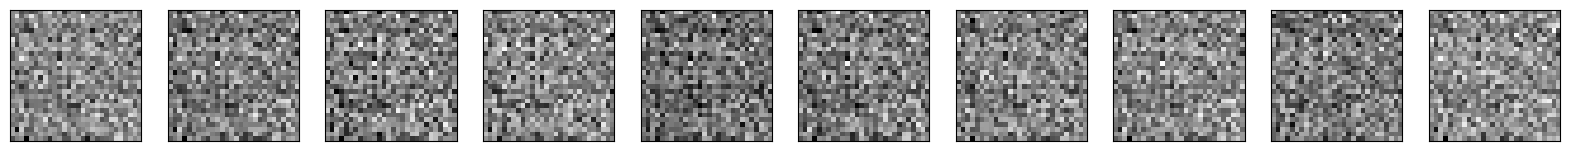

In [ ]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)



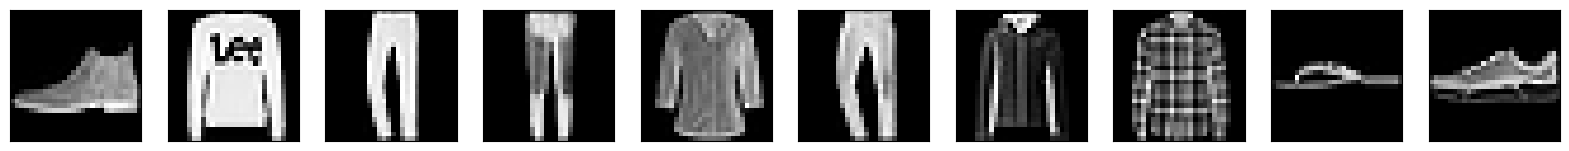

In [ ]:
import matplotlib.pyplot as plt
n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


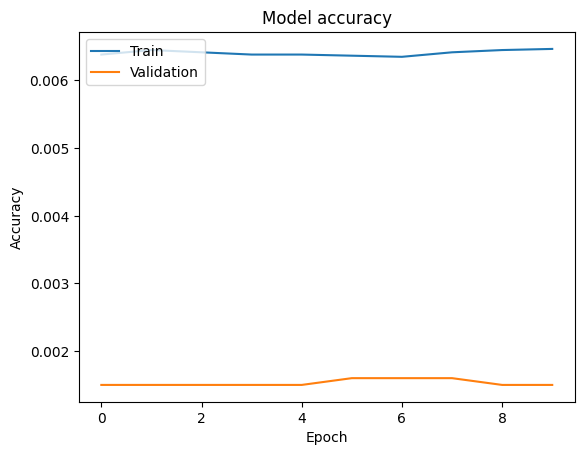

In [ ]:

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

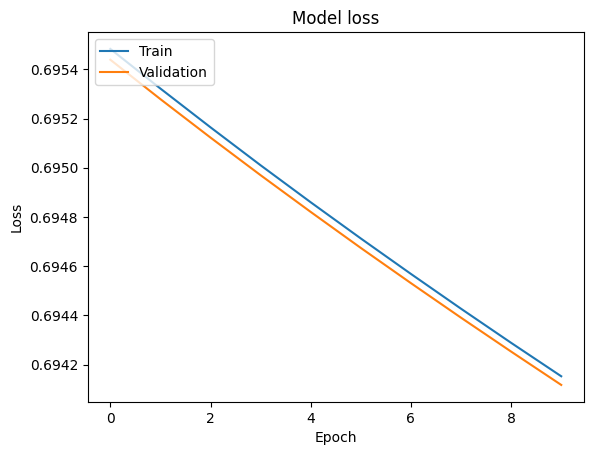

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()